# Week 5 Extra

## Week 4 Logistic Regression
1. Machine Learning: Classification Exercise
2. Extra Material: Plotting Precision-Recall Curve

## Week 5 Extra
<span style="color:blue; font-size:1.5em">CART</span>
1. What are CART Models?
2. Difference between classification and regression trees
3. Decision Trees vs Regression Models
4. Ensemble Methods - Bagging vs Boosting
5. Build a Decision Tree/Random Forest

<span style="font-size:3em; color:green">Week 4 Logistic Regression</span>

I will give you a dataset with a data dictionary. You will clean it and run both a kNN and logistic regression. This is a very difficult dataset and it is an actual survey. If you want to check if your thinking process is correct, you can come talk to me and I can give you some insight.

I will provide very generic outlines of what you should be doing. I want to encourage everyone to learn everything about the data that when you get any "number," you are capable of explaining it.

<span style="color:red; font-size:1.5em">Try to do as much as possible based off of memory and reading the documentation</span>

---

<span style="color:green; font-size:2em">Data Dictionary</span>

---

### Humor styles questions encoding reference

### 32 questions:

Subjects answered **32** different questions outlined below:

1. I usually don't laugh or joke with other people.
2. If I feel depressed, I can cheer myself up with humor.
3. If someone makes a mistake, I will tease them about it.
4. I let people laugh at me or make fun of me at my expense more than I should.
5. I don't have to work very hard to make other people laugh. I am a naturally humorous person.
6. Even when I'm alone, I am often amused by the absurdities of life.
7. People are never offended or hurt by my sense of humor.
8. I will often get carried away in putting myself down if it makes family or friends laugh.
9. I rarely make other people laugh by telling funny stories about myself.
10. If I am feeling upset or unhappy I usually try to think of something funny about the situation to make myself feel better.
11. When telling jokes or saying funny things, I am usually not concerned about how other people are taking it.
12. I often try to make people like or accept me more by saying something funny about my own weaknesses, blunders, or faults.
13. I laugh and joke a lot with my closest friends.
14. My humorous outlook on life keeps me from getting overly upset or depressed about things.
15. I do not like it when people use humor as a way of criticizing or putting someone down.
16. I don't often say funny things to put myself down.
17. I usually don't like to tell jokes or amuse people.
18. If I'm by myself and I'm feeling unhappy, I make an effort to think of something funny to cheer myself up.
19. Sometimes I think of something that is so funny that I can't stop myself from saying it, even if it is not appropriate for the situation.
20. I often go overboard in putting myself down when I am making jokes or trying to be funny.
21. I enjoy making people laugh.
22. If I am feeling sad or upset, I usually lose my sense of humor.
23. I never participate in laughing at others even if all my friends are doing it.
24. When I am with friends or family, I often seem to be the one that other people make fun of or joke about.
25. I donít often joke around with my friends.
26. It is my experience that thinking about some amusing aspect of a situation is often a very effective way of coping with problems.
27. If I don't like someone, I often use humor or teasing to put them down.
28. If I am having problems or feeling unhappy, I often cover it up by joking around, so that even my closest friends don't know how I really feel.
29. I usually can't think of witty things to say when I'm with other people.
30. I don't need to be with other people to feel amused. I can usually find things to laugh about even when I'm by myself.
31. Even if something is really funny to me, I will not laugh or joke about it if someone will be offended.
32. Letting others laugh at me is my way of keeping my friends and family in good spirits.

---

### Response scale:

For each question, there are 5 possible response codes ("likert scale") that correspond to different answers. There is also a code that indicates there is no response for that subject.

    1 == "Never or very rarely true"
    2 == "Rarely true"
    3 == "Sometimes true"
    4 == "Often true"
    5 == "Very often or always true
    [-1 == Did not select an answer]
    
---

### Demographics:

    age: entered as as text then parsed to an interger.
    gender: chosen from drop down list (1=male, 2=female, 3=other, 0=declined)
    accuracy: How accurate they thought their answers were on a scale from 0 to 100, answers were entered as text and parsed to an integer. They were instructed to enter a 0 if they did not want to be included in research.	

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
hsq = pd.read_csv('/Users/matanefron/ds_class_2017_new/DS-SF-32/review and prework/review_datasets/hsq_data.csv')

In [4]:
hsq.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhancing,agressive,selfdefeating,age,gender,accuracy
0,2,2,3,1,4,5,4,3,4,3,...,4,2,2,4.0,3.5,3.0,2.3,25,2,100
1,2,3,2,2,4,4,4,3,4,3,...,4,3,1,3.3,3.5,3.3,2.4,44,2,90
2,3,4,3,3,4,4,3,1,2,4,...,5,4,2,3.9,3.9,3.1,2.3,50,1,75
3,3,3,3,4,3,5,4,3,-1,4,...,5,3,3,3.6,4.0,2.9,3.3,30,2,85
4,1,4,2,2,3,5,4,1,4,4,...,5,4,2,4.1,4.1,2.9,2.0,52,1,80


In [5]:
hsq.shape

(1071, 39)

In [6]:
hsq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 39 columns):
Q1               1071 non-null int64
Q2               1071 non-null int64
Q3               1071 non-null int64
Q4               1071 non-null int64
Q5               1071 non-null int64
Q6               1071 non-null int64
Q7               1071 non-null int64
Q8               1071 non-null int64
Q9               1071 non-null int64
Q10              1071 non-null int64
Q11              1071 non-null int64
Q12              1071 non-null int64
Q13              1071 non-null int64
Q14              1071 non-null int64
Q15              1071 non-null int64
Q16              1071 non-null int64
Q17              1071 non-null int64
Q18              1071 non-null int64
Q19              1071 non-null int64
Q20              1071 non-null int64
Q21              1071 non-null int64
Q22              1071 non-null int64
Q23              1071 non-null int64
Q24              1071 non-null int64
Q25  

### Since gender is mostly males and females, subset the data into males and females only. This will be our target variable. You can also just use all of them and see how it affects your outcome.

In [7]:
hsq2 = hsq[((hsq['gender']==1) | (hsq['gender']==2)) & (hsq['age']<151)]
hsq2.groupby('gender').count()
hsq2.tail()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q30,Q31,Q32,affiliative,selfenhancing,agressive,selfdefeating,age,gender,accuracy
1066,3,2,3,3,2,5,3,2,3,4,...,4,4,4,2.5,3.3,2.9,3.0,18,2,95
1067,1,4,5,2,4,4,1,2,2,5,...,4,1,2,4.8,3.9,2.5,2.4,31,1,95
1068,1,4,4,5,4,4,3,5,4,3,...,4,1,5,4.4,3.9,3.0,4.3,15,1,95
1069,3,4,4,3,3,4,3,2,4,3,...,4,3,3,3.1,3.6,2.9,2.8,21,2,87
1070,4,2,1,3,3,5,3,2,4,3,...,4,3,1,3.4,3.0,3.0,2.5,30,2,75


### Look at the data, do you see any trends? (hint: GroupBy, Correlation)

In [8]:
hsq2['age2']=hsq2['age']


/Users/matanefron/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [9]:
hsq2['age'].quantile(.95)

51.0

In [10]:
hsq2.ix[hsq2.age >= hsq2['age'].quantile(.8),'age2']=hsq2['age'].quantile(.8)  
hsq2.ix[(hsq2.age >= hsq2['age'].quantile(.6)) & (hsq2.age < hsq2['age'].quantile(.8)) ,'age2']=hsq2['age'].quantile(.6) 
hsq2.ix[(hsq2.age >= hsq2['age'].quantile(.4)) & (hsq2.age < hsq2['age'].quantile(.6)) ,'age2']=hsq2['age'].quantile(.4) 
hsq2.ix[(hsq2.age >= hsq2['age'].quantile(.2)) & (hsq2.age < hsq2['age'].quantile(.4)) ,'age2']=hsq2['age'].quantile(.2) 
hsq2.ix[hsq2.age < hsq2['age'].quantile(.2),'age2']=hsq2['age'].quantile(.1) 
hsq2.head()

/Users/matanefron/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q31,Q32,affiliative,selfenhancing,agressive,selfdefeating,age,gender,accuracy,age2
0,2,2,3,1,4,5,4,3,4,3,...,2,2,4.0,3.5,3.0,2.3,25,2,100,25.0
1,2,3,2,2,4,4,4,3,4,3,...,3,1,3.3,3.5,3.3,2.4,44,2,90,34.0
2,3,4,3,3,4,4,3,1,2,4,...,4,2,3.9,3.9,3.1,2.3,50,1,75,34.0
3,3,3,3,4,3,5,4,3,-1,4,...,3,3,3.6,4.0,2.9,3.3,30,2,85,25.0
4,1,4,2,2,3,5,4,1,4,4,...,4,2,4.1,4.1,2.9,2.0,52,1,80,34.0


In [168]:
hsq2.groupby('age2')['gender'].count()

age2
16.0    192
18.0    208
21.0    208
25.0    235
34.0    212
Name: gender, dtype: int64

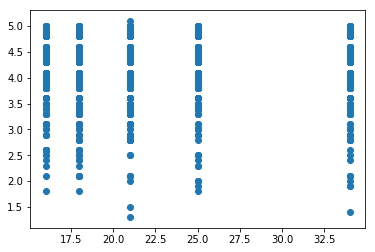

In [30]:
df = hsq2.groupby('age').agg({'agressive':np.mean,'affiliative':np.mean,'selfenhancing':np.mean,'selfdefeating':np.mean})
df2=hsq2[['gender','age2','agressive','affiliative','selfenhancing','selfdefeating']]



y=df2['affiliative']
x=df2['age2']

#print y
#print x
#print y
#print x#bins = [2,3,4]

plt.scatter(x,y)

plt.show()

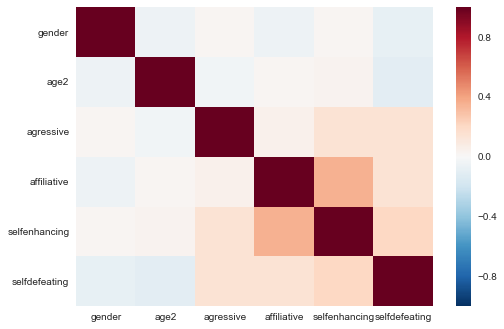

In [51]:
sns.heatmap(df2.corr(method='spearman'))
plt.show()

--Graph results by Age

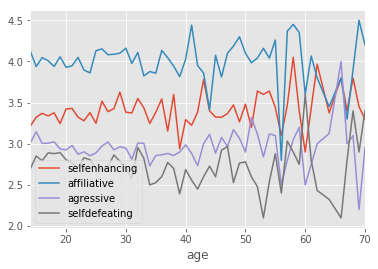

In [103]:

plt.show()

In [53]:
### Try running seaborn's pairplot with affiliative, selfenhancing, agressive, selfdefeating, age, accuracy by gender

#Use the code below to run your pairplot by inserting your subsetted dataframe into data.

colors = sns.xkcd_palette(['dandelion', 'claret'])

sns.pairplot(data=df2, hue='gender', palette={k:colors[k] for k in range(2)}, plot_kws=dict(alpha=0.3))


##Try to explain what is happening in each plot!

#<span style="color:red">Warning: Don't use a pairplot on the ENTIRE dataset. It will take a very long time or crash your computer.</span>

KeyError: 2

### Plot a correlation heatmap, remember to use spearman's correlation!

### Run a kNN and logreg, which model performed better?
Use any previous concepts learned in class or from the prework to run your model.
1. Patsy
2. Train_Test_Split (remember to stratify!)
3. GridSearch or GridSearchCV
4. Modeling
5. Cross Validation

### Since Logistic Regression is a Regression, you can run Lasso and Ridge. Run a Lasso and Ridge and compare it with kNN. Did it do better or worse? Why?

1. Standardization is key!
2. Use the below parameters to run your GridSearch. You have to use liblinear to run Lasso penalty. L1 is Lasso, L2 is Ridge. C is regularization strength for Logistic Regression, which is the inverse of alpha: 1/alpha. It's weird, no idea why they did this.
```
lr_params = {
    'penalty':['l1','l2'],
    'solver':['liblinear'],
    'C':np.linspace(0.0001, 1000, 50)
}
```

### Did you do the reports when comparing models?
1. Classification Report
2. Confusion Matrix
3. ROC/AUC Curve

### Using Feature Selection, create a DataFrame that has 3 cols: abs(coef) vs coef vs feature name (column name) sorted by abs(coef). What are the best features? Are they the same for both kNN and logreg? What about regularized logreg?

<span style="color:blue; font-size:1em">We do absolute value of coefficient because a high negative coefficient is good as well!</span>

## Week 5 Extra Material

### Precision-Recall tradeoff
Precision - When the model predicts "yes", how often is it correct? <p>
Recall - How often the model predicts yes, when it's actually yes <p>

Here's an example explanation I found online that explains precision and recall!<p>
```
Imagine that, your boyfriend/girlfriend gave you a birthday surprise every year in last 10years.

However, one day, your boyfriend/girlfriend asks you:

‘Sweetie, do you remember all birthday surprises from me?’

This simple question makes your life in danger.

To extend your life, you need to recall all 10 surprising events from your memory.

So, recall is the ratio of a number of events you can correctly recall to a number of all correct events.

If you can recall all 10 events correctly, then, your recall ratio is 1.0 (100%). If you can recall 7 events correctly, your recall ratio is 0.7 (70%).

Now, it’s easier to map the word recall to real life usage of that word.

However, you might be wrong in some answers.

For example, you answers 15 times, 10 events are correct and 5 events are wrong. This means you can recall all events but it’s not so precise.

So, precision is the ratio of a number of events you can correctly recall to a number all events you recall (mix of correct and wrong recalls). In other words, it is how precise of your recall.

From the previous example (10 real events, 15 answers: 10 correct answers, 5 wrong answers), you get 100% recall but your precision is only 66.67% (10 / 15).
```

Typically, Precision and Recall are inversely related. When Precision decreases, recall increase, and vice versa. Depending on the requirement (high precision at the cost of recall, or high recall with lower precision), an appropriate algorithm can be chosen.

### CHALLENGE - PLOTTING A PRECISION-RECALL CURVE
I want you to use the kNN model I wrote below and plot a precision-recall curve. Whenever I try to do something new, I learn from the documentation. Understanding every line of code, why it is necesary and how to implement it as your own. I want you to use the example in this link: http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html and create a precision-recall curve. Here are some tips.

1. Ignore LabelBinarize and OneVsRestClassifier (they are used when you have multiple categories in your target variable), they are not necessary for our model.
2. Ignore micro-average for now, but you can use it later on. Micro-average is considering all positives and negatives together as a single class
3. Copy and paste the entire code and run it. If there are any errors, read the line where the error happened (highlight the jupyter notebook blue and press L) and what the error is.
4. Whenever a variable is assigned, look at where they fit in later.
5. If there is a new function called from a package (such as model.decision_function), read the documentation and google search for stackoverflow answers.
6. Print everything -- what I mean is, if you aren't sure what the for loop is doing, add a Print statement and see what the for loop is doing. It is very helpful once you start breaking down everything.

Try it out!

In [59]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
affair = pd.read_csv('/Users/matanefron/ds_class_2017_new/DS-SF-32/review and prework/review_datasets/affair.csv')

In [46]:
affair.drop('Unnamed: 0', axis=1, inplace=True)

In [47]:
affair.nbaffairs = affair.nbaffairs.map(lambda x: 0 if x == 0 else 1)
affair.sex = affair.sex.map(lambda x: 0 if x == 'male' else 1)
affair.child = affair.child.map(lambda x: 0 if x == 'no' else 1)

In [48]:
affair.head()

,sex,age,ym,child,religious,education,occupation,rate,nbaffairs
0,0,37.0,10.00,0,3,18,7,4,0
1,1,27.0,4.00,0,4,14,6,4,0
2,1,32.0,15.00,1,1,12,1,4,0
3,0,57.0,15.00,1,5,18,6,5,0
4,0,22.0,0.75,0,2,17,6,3,0


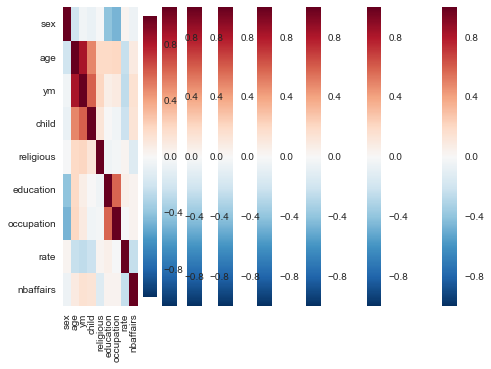

In [50]:
import seaborn as sns
sns.heatmap(affair.corr(method='spearman'))
plt.show()

In [103]:
X = affair[['sex', 'age', 'child', 'religious', 'occupation']]
y = affair.nbaffairs.values

In [124]:
trainX, testX, trainY, testY = train_test_split(X, y, train_size=0.6, stratify=y)
print trainX.shape, testX.shape
print trainY.shape, testY.shape

(360, 5) (241, 5)
(360,) (241,)


In [125]:
knn = KNeighborsClassifier()

params = {
    'n_neighbors':range(1, 100, 1),
    'weights':['uniform', 'distance']
}

gs = GridSearchCV(knn, params, cv=10, verbose=1, n_jobs=1)
gs_results = gs.fit(trainX, trainY)

Fitting 10 folds for each of 198 candidates, totalling 1980 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done 799 tasks       | elapsed:    5.7s
[Parallel(n_jobs=1)]: Done 1249 tasks       | elapsed:    9.0s
[Parallel(n_jobs=1)]: Done 1799 tasks       | elapsed:   13.0s
[Parallel(n_jobs=1)]: Done 1980 out of 1980 | elapsed:   14.3s finished


In [126]:
print 'best params:', gs_results.best_params_
print 'best estimator:', gs_results.best_estimator_
print 'best score:', gs_results.best_score_

best params: {'n_neighbors': 21, 'weights': 'uniform'}
best estimator: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=21, p=2,
           weights='uniform')
best score: 0.755555555556


In [140]:
model = gs_results.best_estimator_.fit(trainX, trainY)
model.predict_proba(trainX)
model.score(trainX, trainY)

0.7583333333333333

In [141]:
model.predict(testX)
model.score(testX, testY)

0.75518672199170123

In [142]:
predicted_y = model.predict(X)
model.score(X, y)

0.75707154742096505

In [161]:
confusion_matrix(y, predicted_y)

array([[449,   2],
       [144,   6]])

In [144]:
print classification_report(y, predicted_y)

             precision    recall  f1-score   support

          0       0.76      1.00      0.86       451
          1       0.75      0.04      0.08       150

avg / total       0.76      0.76      0.66       601



##### Hint: Do you see a problem with the classification report and confusion matrix?
##### Using the information above, create a precision-recall curve! Use X and y, not the train or test set. I plotted it already and deleted the code to give you reference on what it looks like.
##### Hint: Look over my ROC curve done in the previous prework, it is very similar if you get lost!

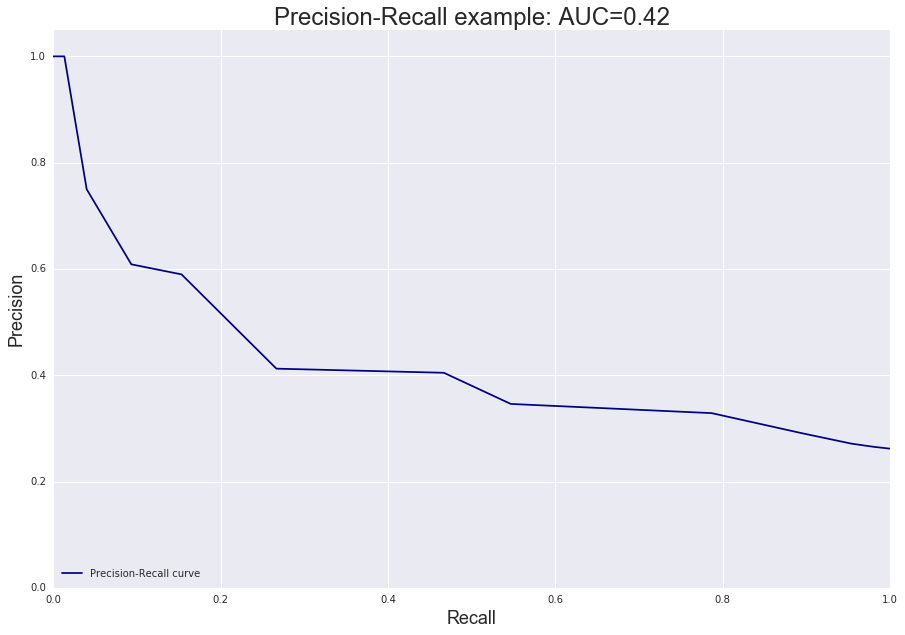

In [159]:
### Don't run this block!!!!!!

### Reporting - Technical vs Non-Technical Report, EDA vs Visualizations

There are many differences between a technical and a non-technical report. You don't want to show someone who has no idea how to code or the process of statistics and you want to show more than just the results to a technical person to see how you got the results. I'll try to explain what is usually put into a technical and non-technical report.

<span style="color:orange; font-size:1.2em">Technical</span><p>
Put all "necessary" code into your technical report, but not all of it. If you did webscraping, SQL queries, data cleaning, EDA and modeling (especially parameters), definitely put at least 1 example of each in (usually you want the most useful EDA that relates to your hypothesis and all the modeling parameters and results explained). You can use definitions without explaining them. You are assuming that the person reading it is also a Data Scientist/Analyst/Engineer/Statistician.

<span style="color:orange; font-size:1.2em">Non-Technical</span><p>
Put minimal to zero code into your non-technical report. Talk about everything you did in layman's terms. If you did webscraping, explain where you scraped it, how much data you received and generally the most important features. If you did modeling, explain briefly what the model does and why you decided to pick this model. Explain every term that is considered "technical," such as Linear Regression. Take screenshots of all your plots ALL LABELED and minimize the amount of color you use; Only highlight the most important factors. You are assuming that the person reading it is your CEO/Stakeholder/Sales/Accountant.

<span style="color:orange; font-size:1.2em">Visualization Tips</span><p>
EDA is different from visualizations. You can plot your target against every single one of your predictors, but do you really need to show all those visualizations on your report? Is your visualizations nicely labeled with minimal colors (no more than 3) and support your claim? Make sure that the visualizations aren't small that nobody can read them or messy with a bunch of numbers. A simple bar graph, highlighting the most important one blue versus the rest being grey is much stronger than each bar graph having the same color.

<span style="font-size:3em; color:green">Week 5 Extra</span>

### What are CART Models? (Tuesday)

CART stands for Classification And Regression Trees. The easiest way to think of how Decision Trees make "decisions":
1. Your entire dataset is the trunk
2. Each branch is a decision
3. End target value is a leaf

As usual, my favorite way of explaining everything is to use dogs and cats! Let's say we are predicting whether the next animal is a dog or a cat. We have features height and weight. So, Decision Trees makes decisions! Assuming if the animals weight is larger than 15 pounds, it is most likely a dog. The tree splits the dataset with into 2 branches, one with all the animals that weigh lower than 15 and animals weighing more than 15 points. Then in each branch, DT will make another decision either on weight again or height. Let's say we set the Decision Tree parameter to only 2 decisions and let's assume it decides to pick height instead of weight. For each branch, if an animal is taller than 1.5 feet, it is more likely to be a dog. Since we only told the DT to make 2 decisions, this is the last decision and become a leaf node, aka End Target. Therefore, it has split into 4 leaf nodes, separating cats and dogs!

### Difference between classification and regression trees
Classification Trees have a target variable being categorical and regression trees have a target variable that is continuous.
```
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
```

### Decision Tress vs Regression Models
Regression Models determines the strength of the relationship between one dependent/target variable while independent/predictor variables changes. Decision Trees make "decisions" by creating a tree-like graph to determine the relationship between one dependent/target variable and its independent/predictor variable.

### Ensemble Methods - Bagging vs Boosting
Good Explanation: http://stats.stackexchange.com/questions/18891/bagging-boosting-and-stacking-in-machine-learning

Here's my generic way of understanding them.

1. Bagging - 
    ```
    1. Take 1 random sample (with replacements)
    2. Run a model
    3. Get a score
    4. Repeat 1-3 1000 times
    5. Using the 95% Confidence Interval, you can find where score should land and the mean is the average scores
    ```
    Bagging can take a very bad model and make it an average model by reducing variance of 1000 biased models.
2. Boosting - 
    ```
    1. Run model
    2. Get score
    3. Boost the model by making decisions on previous model's misclassification
    4. Repeat 1-3 until best score
    ```
    Think Gradient Descent.

3. Stacking -
    ```
    1. Run multiple models on same dataset
    2. Get Predictions
    3. Run a model on the predictions
    4. Profit
    ```

RandomForest (which is a bunch of DecisionTrees, get it?) is bagging. GradientBoostedTree is boosting (Gradient Descent for Decision Trees).

### Build a Decision Tree Classifier and compare with kNN and Logistic Regression

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

##### Again, we will use the affairs dataset

In [2]:
affair = pd.read_csv('/Users/edwardlee/Desktop/df-sf-32/DS-SF-32/review and prework/review_datasets/affair.csv')

In [3]:
affair.head()

,Unnamed: 0,sex,age,ym,child,religious,education,occupation,rate,nbaffairs
0,1,male,37.0,10.00,no,3,18,7,4,0
1,2,female,27.0,4.00,no,4,14,6,4,0
2,3,female,32.0,15.00,yes,1,12,1,4,0
3,4,male,57.0,15.00,yes,5,18,6,5,0
4,5,male,22.0,0.75,no,2,17,6,3,0


In [4]:
affair.isnull().sum()

Unnamed: 0    0
sex           0
age           0
ym            0
child         0
religious     0
education     0
occupation    0
rate          0
nbaffairs     0
dtype: int64

In [5]:
affair.nbaffairs.unique()

array([ 0,  3,  7, 12,  1,  2])

In [6]:
# This will be a categorical target variable
affair.had_affairs = affair.nbaffairs.map(lambda x: 0 if x == 0 else 1)

### As done above, change sex and child to 0 and 1 categorical values

<span style="color:red; font-family:Georgia; font-size:1.5em;">Don't copy and paste. Look up documentations and try to create the code. Don't read stackoverflow, it ends up being copying and pasting. Breaking codes and creating errors is the best way to learn how to code. The more errors you make, the better you'll be.</span>

### Create your predictors (X) and your target variable (y)
Make your target variable had_affairs, you choose your predictor variables. You can do it whatever you want.

### train_test_split
Create a training set and a testing set. Play around with different percentages to see how your model changes. Also, remember to stratify=y in the parameter so that there is an even split of 0 and 1s in the training and testing sets.

### Run a kNN

### Run a Logistic Regression

### Run a Decision Tree Classifier

### Create a Confusion Matrix and Classification Report

### Create a ROC/AUC Curve and a Precision-Recall Curve for each modelled result

### Which model performed the best?

### Plot your Decision Tree!
<span style="color:red">Fair Warning: This package is sort of buggy and might not work for everyone. Read stackoverflow for any fixes</span>


##### REQUIREMENTS:
##### pip install pydot2
##### brew install graphviz (if you haven't installed brew: https://brew.sh/)

##### Use graphviz to make a chart of the classification tree decision points:
```
from sklearn.externals.six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()  

dtree = DecisionTreeClassifier()

export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
```